# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4 - Метод k-средних, предобработка признаков


###### <hr\>
**Общая информация**

**Срок сдачи:** 28 ноября 2018, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 28 ноября, -4 балла после 06:00 5 декабря, -6 баллов после 06:00 12 декабря, -8 баллов после 19 декабря

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Имплементация K-means

Пользуясь наработками выше, имплементируйте метод k-means.  
При инициализации необходимо задавать количество кластеров, функцию расстояния между кластерами (для оригинального k-means - евклидово расстояние) и начальное состояние генератора случайных чисел.

После обучения, среди атрибутов класса `Kmeans` должны появится
* Метки кластеров для объектов
* Координаты центройдов кластеров

k-means - это алгоритм **кластеризации**, а не классификации, а посему метод `.predict()` в нем фактически не нужен, но он может возвращать метки ближайшего кластера для объектов.

###### Задание 1 (2 баллов)
Имплементируйте метод k-means. Задание считается выполненным, если Ваша реализация работает быстрее реализации из sklearn.

Теория для выполнения задания 2 и 3 остаётся на самостоятельное изучение. Теории немного и она совсем простая.

###### Задание 2 (2 балла)
Имплементируйте класс MiniBatchKMeans, который является классом наследником Kmeans.

###### Задание 3 (2 балла)
Превратите k-means в k-means++. Для этого нужно реализовать метод в классе Kmeans, который будет инициализировать более "хорошие" значения центроидов. Чтобы использовался метод k-means++, в параметр init необходимо передать строковое значение 'k-means' (по умолчанию 'random').

###### Задание 4 (2 балла)
В пункте "Проверка корректности метода" нужно нарисовать графики, которые показывают зависимость времени выполнения алгоритма от количества сэмплов. Графики должны быть  нарисованы для различных комбинаций реализаций алгоритма (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). График достаточно построить на 5-10 точках.

###### Задание 5 (2 балла)
В пункте "Применение K-means на реальных данных" нужно сравнить различные реализации k-means (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). После чего написать вывод, в котором должно быть объяснение того, почему один алгоритм оказался лучше остальных или почему не было выявлено лучшего алгоритма.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл
<hr\>

In [395]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [396]:
#%%pycodestyle
from sklearn.metrics import pairwise_distances


class MyKmeans:

    def __init__(self, k=2, metric='euclidean', max_iter=1000,
                 random_state=None, init='random', eps=0.01):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """

        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        self.init = init
        self.eps = eps

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """
        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))

        # Your Code Here
        ind = list(range(X.shape[0]))
        if self.init == "random":
            np.random.shuffle(ind)
            self.centroids = X[ind[:self.k]]
        else:
            first = np.random.randint(X.shape[0])
            self.centroids[0] = X[first]
            for i in range(1, self.k):
                d = pairwise_distances(X, self.centroids,
                                       metric=self.metric).min(axis=1)
                weights = d/d.sum()
                centroid_idx = np.random.choice(X.shape[0], size=1,
                                                replace=False, p=weights)[0]
                self.centroids[i] = X[centroid_idx]
        new_centroids = np.empty((self.k, X.shape[1]))
        for _ in range(self.max_iter):
            self.labels = pairwise_distances(X, self.centroids,
                                             metric=self.metric).argmin(axis=1)
            for i in range(self.k):
                new_centroids[i] = X[np.where(self.labels == i)].mean(axis=0)
            if np.all(np.abs(new_centroids - self.centroids) < self.eps):
                break
            (self.centroids, new_centroids) = (new_centroids, self.centroids)
        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера

        Возвращает метку ближайшего кластера для каждого объекта
        """
        return pairwise_distances(X, self.centroids,
                                  metric=self.metric).argmin(axis=1)


class MiniBatchKMeans(MyKmeans):
    def __init__(self, k=2, metric='euclidean', max_iter=1000,
                 random_state=None, init='random', batch_size=10, eps=0.01):
        super().__init__(k=k, metric=metric, max_iter=max_iter,
                         random_state=random_state, init=init, eps=eps)
        self.batch_size = batch_size

    def fit(self, X):
        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))

        # Your Code Here
        ind = list(range(X.shape[0]))
        if self.init == "random":
            np.random.shuffle(ind)
            self.centroids = X[ind[:self.k]]
        else:
            first = np.random.randint(X.shape[0])
            self.centroids[0] = X[first]
            for i in range(1, self.k):
                d = pairwise_distances(X, self.centroids,
                                       metric=self.metric).min(axis=1)
                weights = d/d.sum()
                centroid_idx = np.random.choice(X.shape[0], size=1,
                                                replace=False, p=weights)[0]
                self.centroids[i] = X[centroid_idx]
        new_centroids = self.centroids
        for _ in range(self.max_iter):
            X_batch = X[np.random.choice(X.shape[0],
                                         replace=False,
                                         size=self.batch_size)]
            labs_batch = pairwise_distances(X_batch, self.centroids,
                                            metric=self.metric).argmin(axis=1)
            for i in range(self.k):
                a = X_batch[np.where(labs_batch == i)]
                if len(a) != 0:
                    new_centroids[i] = a.mean(axis=0)
            if np.all(np.abs(new_centroids - self.centroids) < self.eps):
                break
            self.centroids = new_centroids
        self.labels = self.predict(X)
        return self

### Проверка корректности метода

Перед тем как применять алгоритм на реальных данных, нужно испытать его на простых "игрушечных" данных.

Если алгоритм реализован правильно, то метод должен идеально разбивать на 3 кластера данные ниже. Проверьте это.

ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [397]:
from sklearn.datasets import make_blobs

In [398]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

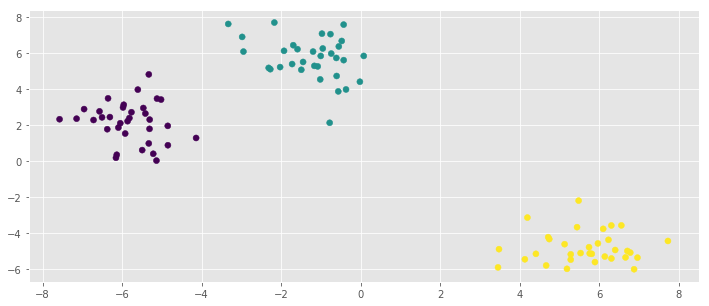

In [399]:
plt.scatter(X[:,0], X[:, 1], c=y)

Проверьте Вашу имплементацию на простых данных (без этого пункта ДЗ не считается выполненным).   
КОММЕНТАРИИ НЕ СТИРАТЬ!

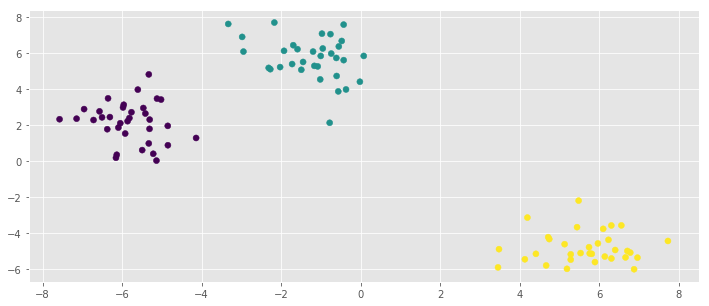

In [400]:
# Работоспособность MyKmeans
a = MyKmeans(k=3)
a.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=a.labels)

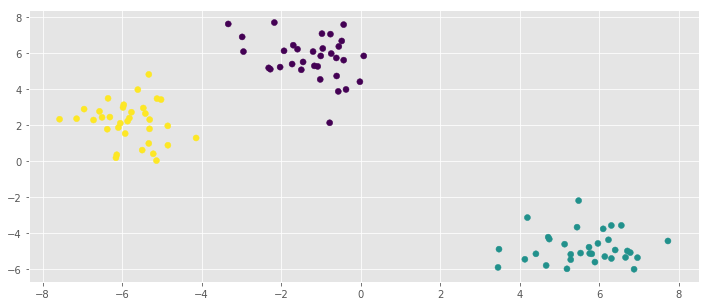

In [401]:
# Работоспособность MyKmeans++
a = MyKmeans(k=3, init="k-means")
a.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=a.labels)

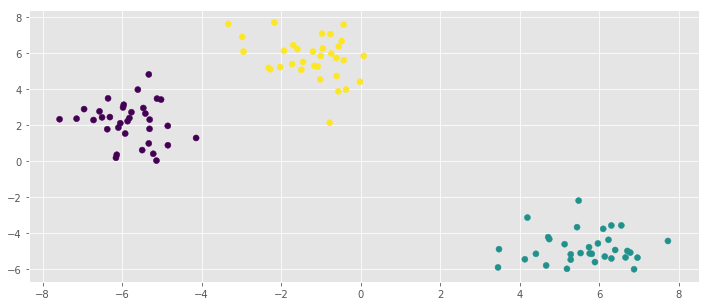

In [402]:
# Работоспособность MyKmeans с MiniBatchMyKmeans
b = MiniBatchKMeans(k=3, batch_size=20)
b.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=b.labels)

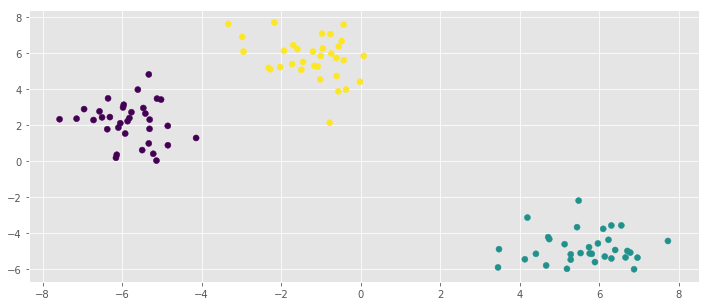

In [404]:
# Работоспособность MyKmeans++ с MiniBatchMyKmeans
b = MiniBatchKMeans(k=3, init="k-means")
b.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=b.labels)

In [405]:
# Время выполнения алгоритма Kmeans из sklearn
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=3, max_iter=1000, precompute_distances=False)
%time clf.fit(X)

Wall time: 41 ms


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances=False,
    random_state=None, tol=0.0001, verbose=0)

In [406]:
# Время выполнения алгоритма MyKmeans
my_clf = MyKmeans(k=3)
%time my_clf.fit(X)

Wall time: 5 ms


In [407]:
# Время выполнения алгоритма MyKmeans++
my_clf = MyKmeans(k=3, init="k-means")
%time my_clf.fit(X)

Wall time: 4.98 ms


In [408]:
## Время выполнения алгоритма MyKmeans с MiniBatchMyKmeans
my_clf = MiniBatchKMeans(k=3)
%time my_clf.fit(X)

Wall time: 2 ms


In [409]:
## Время выполнения алгоритма  MyKmeans++ с MiniBatchMyKmeans
my_clf = MiniBatchKMeans(k=3, init="k-means")
%time my_clf.fit(X)

Wall time: 3 ms


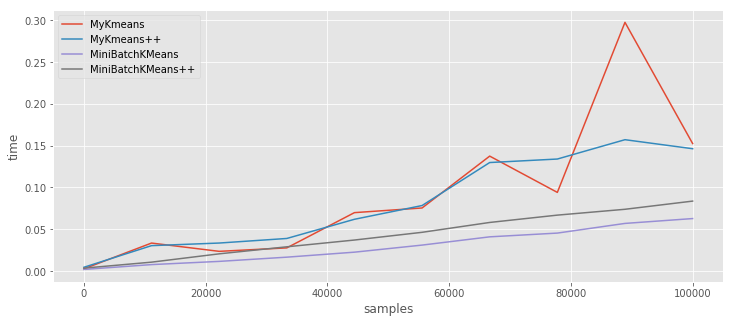

In [315]:
import timeit


n_samples = np.linspace(10, 100000, 10, dtype=int)
model = (
    (MyKmeans(k=3),
         'MyKmeans'),
    (MyKmeans(k=3, init='k-means'),
         'MyKmeans++'),
    (MiniBatchKMeans(k=3),
          'MiniBatchKMeans'),
    (MiniBatchKMeans(k=3, init='k-means'),
          'MiniBatchKMeans++')
)
results = np.empty((len(models), n_samples.shape[0]))

for j, size in enumerate(n_samples):
    X, y = make_blobs(n_samples=size, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

    for i, m in enumerate(model):
        start = timeit.default_timer()
        m[0].fit(X)
        results[i][j] = timeit.default_timer() - start

for i, m in enumerate(model):
    plt.plot(n_samples, results[i], label=m[1])

plt.xlabel("samples")
plt.ylabel("time")
plt.legend()
plt.show()

# Применение K-means на реальных данных

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.  (без этого пункта задание не считается выполненным).   
ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [345]:
df_sns = pd.read_csv('snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [346]:
df_sns = df_sns[df_sns.columns[4:]]
df_sns.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [349]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = np.array(df_sns)
scaler.fit(X)
X = scaler.transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [358]:
df_sns.columns

Index(['basketball', 'football', 'soccer', 'softball', 'volleyball',
       'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute',
       'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music',
       'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde',
       'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die',
       'death', 'drunk', 'drugs', 'cluster'],
      dtype='object')

In [359]:
## MyKMeans
kmeans = MyKmeans(k=9)
kmeans.fit(X)
labels = kmeans.labels
df_sns['cluster'] = labels
for clust in range(9):
    print(df_sns[df_sns['cluster'] == clust][df_sns.columns[:-1]].mean().T.sort_values(ascending=False))
    print()
    print()

god             5.243243
jesus           2.262162
church          1.862162
bible           1.135135
music           1.124324
band            0.432432
hair            0.413514
die             0.389189
shopping        0.375676
dance           0.364865
rock            0.364865
basketball      0.340541
football        0.283784
death           0.278378
cute            0.262162
soccer          0.218919
sex             0.210811
mall            0.208108
softball        0.167568
clothes         0.159459
hot             0.140541
swimming        0.127027
sports          0.124324
volleyball      0.118919
blonde          0.116216
dress           0.116216
tennis          0.102703
sexy            0.094595
drunk           0.091892
drugs           0.083784
baseball        0.083784
cheerleading    0.067568
kissed          0.067568
marching        0.048649
hollister       0.035135
abercrombie     0.021622
dtype: float64


basketball      1.392979
football        1.109589
softball        1.086045
volleyba

Кластер 1 - верующие  
Кластер 2 - спортсмены  
Кластер 3 - девочки  
Кластер 4 - пловцы  
Кластер 5 - рокеры  
Кластер 6 - ценители алкоголя  
Кластер 7 - шопоголики  
Кластер 8 - черлидерши  
Кластер 9 - меломаны-меланхолики 

In [360]:
## MyKMeans++
kmeans = MyKmeans(k=9, init="k-means")
kmeans.fit(X)
labels = kmeans.labels
df_sns['cluster'] = labels
for clust in range(9):
    print(df_sns[df_sns['cluster'] == clust][df_sns.columns[:-1]].mean().T.sort_values(ascending=False))
    print()
    print()

music           0.541611
god             0.312658
dance           0.216526
hair            0.187423
shopping        0.175749
cute            0.153747
soccer          0.152510
band            0.152510
rock            0.151595
church          0.131691
mall            0.120286
football        0.119156
basketball      0.117274
die             0.113293
sex             0.094142
sexy            0.084943
swimming        0.083490
jesus           0.070741
sports          0.068481
volleyball      0.059336
softball        0.058422
clothes         0.054172
hot             0.053849
drunk           0.049707
cheerleading    0.048900
blonde          0.040723
dress           0.035559
kissed          0.032654
baseball        0.031632
tennis          0.025876
drugs           0.020926
hollister       0.014794
abercrombie     0.009307
marching        0.001775
bible           0.000000
death           0.000000
dtype: float64


band            4.100671
marching        1.418792
music           1.216107
god     

Кластер 1 - меломаны-меланхолики  
Кластер 2 - меломаны - бой-скауты  
Кластер 3 - шопоголики  
Кластер 4 - рокеры  
Кластер 5 - спортсмены  
Кластер 6 - люди, склонные к суициду  
Кластер 7 - девочки  
Кластер 8 - верующие  
Кластер 9 - теннисисты

In [364]:
## MyKMeans с MiniBatchMyKMeans
kmeans = MiniBatchKMeans(k=9, batch_size=3000)
kmeans.fit(X)
labels = kmeans.labels
df_sns['cluster'] = labels
for clust in range(9):
    print(df_sns[df_sns['cluster'] == clust][df_sns.columns[:-1]].mean().T.sort_values(ascending=False))
    print()
    print()

band            5.897297
marching        1.951351
music           1.454054
god             0.545946
dance           0.516216
hair            0.383784
rock            0.370270
shopping        0.367568
football        0.345946
cute            0.329730
church          0.302703
mall            0.200000
sex             0.197297
die             0.178378
basketball      0.172973
dress           0.159459
swimming        0.159459
clothes         0.156757
tennis          0.135135
death           0.127027
soccer          0.127027
hot             0.124324
sexy            0.118919
jesus           0.116216
softball        0.116216
kissed          0.094595
blonde          0.091892
sports          0.086486
volleyball      0.072973
cheerleading    0.064865
drunk           0.056757
baseball        0.048649
drugs           0.043243
bible           0.018919
abercrombie     0.016216
hollister       0.010811
dtype: float64


swimming        3.371025
cute            1.240283
music           1.024735
shopping

Кластер 1 - музыканты - бой-скауты  
Кластер 2 - пловцы  
Кластер 3 - девочки - баскетболистки  
Кластер 4 - верующие  
Кластер 5 - горячие воллейболисты  
Кластер 6 - рокеры  
Кластер 7 - верующие  
Кластер 8 - люди, склонные к суициду  
Кластер 9 - меломаны


In [365]:
## MyKMeans++ с MiniBatchMyKMeans
kmeans = MiniBatchKMeans(k=9, init = "k-means", batch_size=3000)
kmeans.fit(X)
labels = kmeans.labels
df_sns['cluster'] = labels
for clust in range(9):
    print(df_sns[df_sns['cluster'] == clust][df_sns.columns[:-1]].mean().T.sort_values(ascending=False))
    print()
    print()

music           0.532625
dance           0.303699
god             0.301528
shopping        0.240000
hair            0.224939
cute            0.211384
basketball      0.198538
soccer          0.188882
football        0.177364
band            0.159690
church          0.137497
mall            0.124961
die             0.114640
rock            0.110698
sex             0.097409
swimming        0.095991
sports          0.095814
volleyball      0.083632
death           0.080266
baseball        0.073178
sexy            0.072913
jesus           0.071141
dress           0.066755
softball        0.065559
tennis          0.062857
clothes         0.059181
hot             0.057364
drunk           0.054264
blonde          0.048151
cheerleading    0.038450
kissed          0.038228
hollister       0.035792
abercrombie     0.024452
drugs           0.024009
marching        0.014086
bible           0.008461
dtype: float64


hair            6.167630
music           4.947977
sex             4.710983
dance   

Кластер 1 - меломаны  
Кластер 2 - рокеры, помешанные на прическе  
Кластер 3 - снова рокеры  
Кластер 4 - шопоголики  
Кластер 5 - спортсмены  
Кластер 6 - верующие девочки  
Кластер 7 - меломаны-спортсмены  
Кластер 8 - спортсмены  
Кластер 9 - черлидерши

## Вывод
Мне показалось, что обе версии MiniBatch работают хуже - есть кластеры, которые хочется объединить (например, 2 кластера с верующими). Думаю, у него точность сходимости может быть меньше, так как меньше итерации по всей выборке.